## main goals : ##

### -time series chaning ####

### -clustering Atlanta into safe and non safe places  ### 

### over view ### 

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
raw_data=pd.read_csv(r'../input/atlantacrimedata/atlcrime.csv')
raw_data.head()

In [ ]:
raw_data.columns

In [ ]:
raw_data.drop(['Unnamed: 0','location'],axis=1,inplace=True)

In [ ]:
raw_data.info()

In [ ]:
data=raw_data.drop(['npu','beat','number'],axis=1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

In [ ]:
data['date']=pd.to_datetime(data['date'])
data.sort_values(by='date',inplace=True)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})


In [ ]:
data.groupby('crime').count()[['date']].sort_values(by='date').plot(kind='barh')
plt.xlabel('crime numbers')
plt.title('CRIMES');

* the larceny from vehicle is seizing the first place 

### time sreies 

In [ ]:
data['date'].min(),data['date'].max()

it started 2009 ended in 2017 

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})


In [ ]:
data.groupby('date').count().resample('M').sum()[['crime']].plot()
plt.ylabel('crime number');
plt.title('crime numberes changing over time');


* as we see that the crime numbers drop in the first months of the Year 

* well in the middle it reaches its peak 

**the over trend is going in decreasing *** 

In [ ]:
#whcih time of the year has more crimes 
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day


In [ ]:
sns.countplot(x='month', data=data,color='r')

In [ ]:
sns.set(rc={'figure.figsize':(7,12)})


**1 , 7 , 12** highest in crime

**2** is the lowest 

In [ ]:
df=data.groupby(['crime','date']).count()[['lat']]

In [ ]:
df.reset_index('crime').groupby('crime', group_keys=False).resample('3M').sum().pad()

In [ ]:
new=df.reset_index('crime').groupby('crime', group_keys=False).resample('3M').sum().pad()
col=df.reset_index('crime').groupby('crime', group_keys=False).resample('3M').pad()[['crime']]
#resampling the date in multiindex 

In [ ]:
crime=pd.concat([new, col], axis=1)

In [ ]:
g = sns.FacetGrid(crime, col="crime",col_wrap=4,sharey=False)
g.map_dataframe(sns.lineplot,"date","lat", data=crime);
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}");
g.set_xticklabels(rotation=35)


 * ***AGG assault **** is kind of decressing 
 * ***Auto theft **** is kind of decressing
 *  ***burglary-noneres **** is decressing
 *  ***Homicide **** is increasing 
 *  ***larceny-from vehicle **** was decressing then increaed 
 *  ***larceny-non vehicle **** is decressing
 *  ***Rape **** is increasing big time 
 *  ***robbery-commercial ****  kinda decressing
 *  ***robbery-pedestrian **** is decressing 
 *  ***robbery-residence **** is decressing
 
### to make a long story short ,all crimes going down excpet for Rape and Homoicide are increasing Big time

# I think I've finished with the time series analysis ain't nothing to do more , still open for new ideas 

### Location

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})


In [ ]:
data.plot.scatter(y='lat',x='long');

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})


In [ ]:
#crime distrubiton in atlanta 
def show(crime):
    data[['cri']]=(data[['crime']] == crime) * 1
    if data['cri'].sum() > len(data)/50:
        a=0.1
    else:
        a=1
    return data.plot.scatter(y='lat',x='long',c='cri',alpha=a,title=crime);

In [ ]:
col=data['crime'].unique()
for i in col:
    show(i)

***larceny-from vehcial*** : Stationed in the nordic middler 

***larceny-Non vehcial*** : a few random spots

***auto theft*** : not specific 

***burgalry-resdience*** : pretty much Stationed  expet for middle is the safest

***burgalr-nonres*** : not specific  

***AGG assault*** : in the westic middle , and the south 

**robbery pedestrain*** :not specific

**Robbery-residance** : It is common in specific places

**rape** : It is common in specific places

**robery** : It is common in specific places

**Homicide** : It is common in specific places

### cluster the city into zones : 

In [ ]:
data.head()

In [ ]:
location=data[['lat','long']]

In [ ]:
df=pd.get_dummies(data[['crime']])

In [ ]:
new_df=pd.concat([df, location], axis=1)

In [ ]:
crime_uni=new_df.columns

In [ ]:
X=new_df[['lat', 'long']]

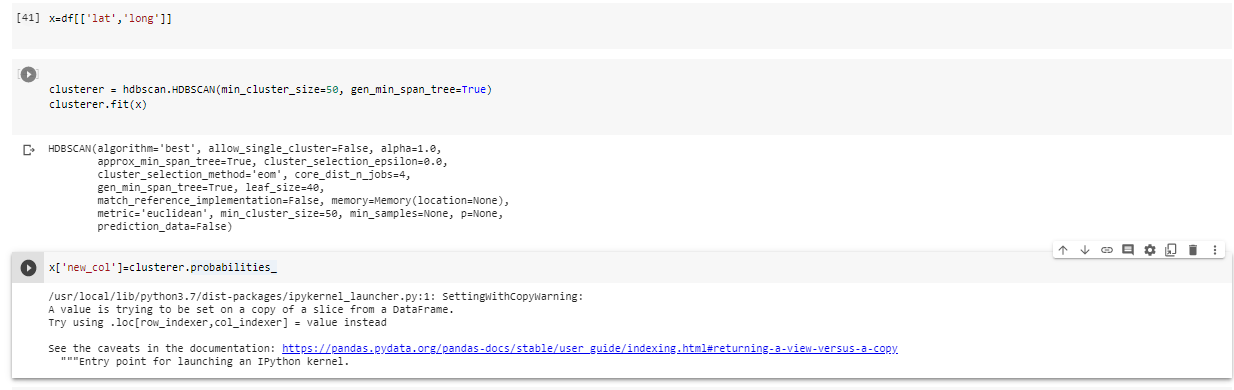

using the HBSCAN model to dseprate safe places from danger places

*** used the google colab for this part as my pc couldn't handle it *** 

In [ ]:
df=pd.read_csv('../input/atlantacrimedata/filename.csv')

In [ ]:
df.plot.scatter(y='lat',x='long',c='new_col');

*** 0 : for the safest , while the 1 : for the most dangerous *** 

***the safest place is the North West ***